In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
import numpy as np

In [4]:
!pip install pyarrow

You should consider upgrading via the 'C:\Users\udain\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
df = pd.read_parquet(r'D:\hackathon_HOD\clean_df.parquet')


In [4]:
df.head()

,security_product_name,machine_version,app_version,av_sig_version,is_beta,rtp_state,is_sxs_passive,av_status,av_prod_installed,av_prod_enabled,...,secure_boot_status,virtual_dev_status,touch_support,pen_support,aoac_support,is_gamer,region_id,malware_status,age,sex
machine_id,,,,,,,,,,,,,,,,,,,,,
4300000,4,65,77,8109,0,7.0,0,53447.0,1.0,1.0,...,0,0.0,0,0,0.0,0.0,1.0,0,41.845023,1
4300001,4,64,51,7767,0,7.0,0,53447.0,1.0,1.0,...,1,0.0,0,0,0.0,1.0,3.0,1,44.207637,0
4300002,4,65,57,7919,0,7.0,0,53447.0,1.0,1.0,...,1,0.0,0,0,0.0,0.0,15.0,0,42.366857,0
4300003,4,65,57,7985,0,7.0,0,53447.0,1.0,1.0,...,0,0.0,0,0,0.0,0.0,11.0,1,38.020295,0
4300004,4,64,51,7720,0,7.0,0,53447.0,1.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,1,53.077069,1


In [6]:
sample_df = df.sample(n=10000, random_state=42)

In [7]:
sample_df

,security_product_name,machine_version,app_version,av_sig_version,is_beta,rtp_state,is_sxs_passive,av_status,av_prod_installed,av_prod_enabled,...,secure_boot_status,virtual_dev_status,touch_support,pen_support,aoac_support,is_gamer,region_id,malware_status,age,sex
machine_id,,,,,,,,,,,,,,,,,,,,,
1577888,4,65,57,7898,0,7.0,0,53447.0,1.0,1.0,...,1,0.0,1,0,0.0,0.0,6.0,0,43.461067,1
4893932,4,65,57,8022,0,7.0,0,53447.0,1.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,1,42.006021,0
1694900,4,64,57,7459,0,7.0,0,53447.0,1.0,1.0,...,0,0.0,0,0,0.0,0.0,7.0,0,39.783562,0
1020497,4,66,26,7902,0,7.0,0,53447.0,1.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,0,37.159751,0
4634465,4,53,29,5560,0,7.0,0,53447.0,1.0,1.0,...,0,0.0,1,0,0.0,1.0,11.0,1,46.088921,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4059612,4,64,93,7843,0,7.0,0,53447.0,1.0,1.0,...,0,0.0,0,0,0.0,0.0,10.0,1,39.022936,0
2241198,4,65,57,8182,0,7.0,0,53447.0,1.0,1.0,...,1,0.0,0,0,0.0,0.0,3.0,0,30.451981,0
3223571,4,65,57,8144,0,7.0,0,53447.0,1.0,1.0,...,0,0.0,0,0,0.0,0.0,9.0,0,40.116342,1


In [8]:
y = sample_df.malware_status
X = sample_df.drop(['malware_status'], axis=1)

In [9]:
X

,security_product_name,machine_version,app_version,av_sig_version,is_beta,rtp_state,is_sxs_passive,av_status,av_prod_installed,av_prod_enabled,...,firmware_version_id,secure_boot_status,virtual_dev_status,touch_support,pen_support,aoac_support,is_gamer,region_id,age,sex
machine_id,,,,,,,,,,,,,,,,,,,,,
1577888,4,65,57,7898,0,7.0,0,53447.0,1.0,1.0,...,17680.0,1,0.0,1,0,0.0,0.0,6.0,43.461067,1
4893932,4,65,57,8022,0,7.0,0,53447.0,1.0,1.0,...,26320.0,1,0.0,0,0,0.0,0.0,10.0,42.006021,0
1694900,4,64,57,7459,0,7.0,0,53447.0,1.0,1.0,...,19844.0,0,0.0,0,0,0.0,0.0,7.0,39.783562,0
1020497,4,66,26,7902,0,7.0,0,53447.0,1.0,1.0,...,21665.0,1,0.0,0,0,0.0,0.0,10.0,37.159751,0
4634465,4,53,29,5560,0,7.0,0,53447.0,1.0,1.0,...,20050.0,0,0.0,1,0,0.0,1.0,11.0,46.088921,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4059612,4,64,93,7843,0,7.0,0,53447.0,1.0,1.0,...,11769.0,0,0.0,0,0,0.0,0.0,10.0,39.022936,0
2241198,4,65,57,8182,0,7.0,0,53447.0,1.0,1.0,...,20317.0,1,0.0,0,0,0.0,0.0,3.0,30.451981,0
3223571,4,65,57,8144,0,7.0,0,53447.0,1.0,1.0,...,67756.0,0,0.0,0,0,0.0,0.0,9.0,40.116342,1


In [10]:
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame()
# transform data
for cols in X.columns:
    X_scaled[[cols]]= scaler.fit_transform(X[[cols]])

print((X_scaled < 0).any().any())


False


In [11]:
y

machine_id
1577888    0
4893932    1
1694900    0
1020497    0
4634465    1
          ..
4059612    1
2241198    0
3223571    0
321007     0
2054004    1
Name: malware_status, Length: 10000, dtype: int64

In [12]:
X_kbest = chi2(X_scaled, y)
print(X_kbest)

(array([1.25855877e-04, 4.34647258e-01, 5.98571345e-02, 4.16142345e-01,
                  nan, 2.39464786e-01, 8.50429226e+00, 7.09463745e+00,
       4.89901605e+01, 5.82644839e-02, 7.55728164e-05, 4.25697364e-02,
       2.78221194e-03, 1.23736778e-02, 4.21410820e-02, 4.67314969e-01,
       1.90986582e+00, 4.93745033e+01, 2.33147807e+00, 2.23388255e-01,
       2.15167704e-01, 2.77557060e-01, 4.55252979e-01, 9.02828164e-02,
       1.33087667e+00,            nan, 1.99520575e+00, 4.18025148e-01,
       1.95901560e+01, 6.77193373e-02, 1.02057676e-02, 3.50558913e-01,
       2.88992675e+00, 8.62917926e-01, 8.92799113e-02, 1.11463770e+00,
       1.58951152e-01, 3.01087684e-02, 1.75432563e+00, 2.44239117e+00,
       1.12207672e-01, 1.77941161e+00, 7.43979537e-01, 2.19468810e-01,
       9.34602530e-01, 2.35593097e-01, 5.86332592e-02, 1.78404020e+00,
       3.63330320e+00, 6.55000703e-01, 4.70308031e+01, 2.91456924e-02,
       7.31565741e-01, 1.15431165e+00, 5.67808859e-01, 6.51970521e-01,
     

In [13]:
p_values = pd.Series(X_kbest[1],index = X_scaled.columns)
p_values.sort_values(ascending = False , inplace = True)

In [14]:
drop_cols = p_values.index[1:37]
drop_cols

Index(['security_product_name', 'install_language_identifier', 'state_name',
       'city_id', 'flight_ring', 'uac_luaenable', 'org_id', 'auto_update_opt',
       'age', 'branch', 'firmware_version_id', 'model_id.1', 'geo_id',
       'country_id', 'ui_locale_identifier', 'av_prod_enabled',
       'display_resolution_vertical', 'app_version', 'firewall', 'model_id',
       'sku_edition', 'sex', 'system_volume_capacity', 'manufacturer_id',
       'os_suite', 'chassis_type', 'os_build', 'display_resolution_horizontal',
       'rtp_state', 'os_ptfm_sub_release', 'mdc2_form_factor',
       'install_type_name', 'av_sig_version', 'ie_ver_id', 'machine_version',
       'os_build_lab'],
      dtype='object')

<AxesSubplot:>

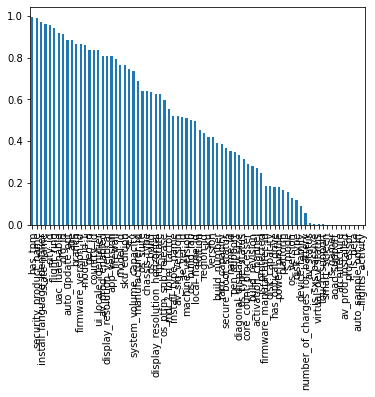

In [15]:
p_values.plot.bar()

In [64]:
com_cols_drop = ['uac_luaenable', 'security_product_name', 'oem_model_id', 'geo_id','flight_ring', 'has_tpm', 'org_id', 'firewall', 'platform','city_id', 'state_name', 'secure_boot_status', 'os_build_lab','mdc2_form_factor', 'branch', 'system_volume_capacity',
'chassis_type', 'ie_ver_id', 'manufacturer_id',
'display_resolution_vertical', 'av_prod_enabled',
'auto_update_opt', 'sku_edition', 'build_revision',
'local_name_id']

In [65]:
left_cols = []
for i in drop_cols:
    if i not in com_cols_drop:
        left_cols.append(i)


In [66]:
left_cols

['os_version',
 'activation_channel',
 'diagonal_display_size',
 'model_id',
 'rtp_state',
 'install_type_name',
 'os_ptfm_sub_release',
 'firmware_manufacturer_id']

In [46]:
left_cols[0]

'os_version'

In [47]:
for i in range(0,4):
    print(i)

0
1
2
3


In [67]:
cols_to_drop_by_me = []

for i in range(0,4):
    cols_to_drop_by_me.append(left_cols[i])

cols_to_drop_by_me

['os_version', 'activation_channel', 'diagonal_display_size', 'model_id']

In [68]:
for i in com_cols_drop:
    cols_to_drop_by_me.append(i)


In [69]:
len(cols_to_drop_by_me)

29

In [54]:
cols_to_drop_by_me

['os_version',
 'activation_channel',
 'diagonal_display_size',
 'model_id',
 'uac_luaenable',
 'security_product_name',
 'oem_model_id',
 'geo_id',
 'flight_ring',
 'has_tpm',
 'org_id',
 'firewall',
 'platform',
 'city_id',
 'state_name',
 'secure_boot_status',
 'os_build_lab',
 'mdc2_form_factor',
 'branch',
 'system_volume_capacity',
 'chassis_type',
 'ie_ver_id',
 'manufacturer_id',
 'display_resolution_vertical',
 'av_prod_enabled',
 'auto_update_opt',
 'sku_edition',
 'build_revision',
 'local_name_id']

In [70]:
drop_col_kaushik = ['os_type_status', 'uac_luaenable', 'default_browser', 'pua_mode',
       'processor_class', 'security_product_name', 'oem_model_id', 'geo_id',
       'flight_ring', 'firmware_version_id', 'has_tpm', 'org_id', 'firewall',
       'platform', 'city_id', 'state_name', 'secure_boot_status',
       'battery_type', 'os_build_lab', 'mdc2_form_factor', 'branch',
       'system_volume_capacity', 'chassis_type', 'ie_ver_id',
       'manufacturer_id', 'display_resolution_vertical', 'av_prod_enabled',
       'auto_update_opt', 'sku_edition', 'build_revision', 'machine_version',
       'local_name_id','country_id']

drop_kaushik_left = []

for i in drop_col_kaushik:
    if i not in cols_to_drop_by_me:
       drop_kaushik_left.append(i)

In [71]:
drop_kaushik_left

['os_type_status',
 'default_browser',
 'pua_mode',
 'processor_class',
 'firmware_version_id',
 'battery_type',
 'machine_version',
 'country_id']

In [72]:

drop_kaushik_left = ['os_type_status', 'firmware_version_id', 'machine_version', 'country_id' ]

for i in range(0,4):
    cols_to_drop_by_me.append(drop_kaushik_left[i])

final_drop = cols_to_drop_by_me
len(final_drop)

33

In [16]:
final_drop = drop_cols

In [17]:
print(final_drop)

Index(['security_product_name', 'install_language_identifier', 'state_name',
       'city_id', 'flight_ring', 'uac_luaenable', 'org_id', 'auto_update_opt',
       'age', 'branch', 'firmware_version_id', 'model_id.1', 'geo_id',
       'country_id', 'ui_locale_identifier', 'av_prod_enabled',
       'display_resolution_vertical', 'app_version', 'firewall', 'model_id',
       'sku_edition', 'sex', 'system_volume_capacity', 'manufacturer_id',
       'os_suite', 'chassis_type', 'os_build', 'display_resolution_horizontal',
       'rtp_state', 'os_ptfm_sub_release', 'mdc2_form_factor',
       'install_type_name', 'av_sig_version', 'ie_ver_id', 'machine_version',
       'os_build_lab'],
      dtype='object')


In [18]:
final_df = df.drop(final_drop, axis=1)

In [19]:
final_df

,is_beta,is_sxs_passive,av_status,av_prod_installed,has_tpm,local_name_id,platform,processor,os_version,is_protected,...,flights_activity,firmware_manufacturer_id,secure_boot_status,virtual_dev_status,touch_support,pen_support,aoac_support,is_gamer,region_id,malware_status
machine_id,,,,,,,,,,,,,,,,,,,,,
4300000,0,0,53447.0,1.0,1,75,0,1,0,1.0,...,0.0,556.0,0,0.0,0,0,0.0,0.0,1.0,0
4300001,0,0,53447.0,1.0,1,182,0,1,0,1.0,...,0.0,142.0,1,0.0,0,0,0.0,1.0,3.0,1
4300002,0,0,53447.0,1.0,1,124,0,1,0,1.0,...,0.0,142.0,1,0.0,0,0,0.0,0.0,15.0,0
4300003,0,0,53447.0,1.0,1,113,0,1,0,1.0,...,0.0,554.0,0,0.0,0,0,0.0,0.0,11.0,1
4300004,0,0,53447.0,1.0,1,75,0,1,0,1.0,...,0.0,355.0,1,0.0,0,0,0.0,0.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899995,0,0,53447.0,1.0,1,69,0,1,0,1.0,...,0.0,556.0,0,0.0,0,0,0.0,0.0,1.0,1
4899996,0,0,62773.0,1.0,1,233,0,1,0,0.0,...,0.0,628.0,1,0.0,0,0,0.0,0.0,15.0,1
4899997,0,0,23657.0,2.0,1,182,0,1,0,1.0,...,0.0,142.0,0,0.0,0,0,0.0,1.0,3.0,1


In [20]:
final_df.to_parquet('training_data.parquet')